# **Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
# Load the combined dataset
df = pd.read_csv('data.csv')
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
# Filter required features and drop rows with missing values
#features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Benzene','NO','NOx','NH3','Toluene','Xylene']
df = df[features + ['AQI']].dropna()

# Split into features and target
X = df[features]
y = df['AQI']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [ ]:
y_test[:5]

array([[-0.34964923],
       [ 2.03470862],
       [-0.44631239],
       [-1.11221413],
       [-0.97258957]])

# **1.RandomForestRegressor**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X_train, y_train)
x_train_fs = fs.transform(X_train)
x_test_fs = fs.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_fs,y_train)

RandomForestRegressor()

In [ ]:
y_prediction =  regressor.predict(x_test_fs)

In [ ]:
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9487592408888028
mean_sqrd_error is  0.0491798035440475
Root mean squared error of is 0.22176519912747245
Mean Absolute error is 0.14907107575580048


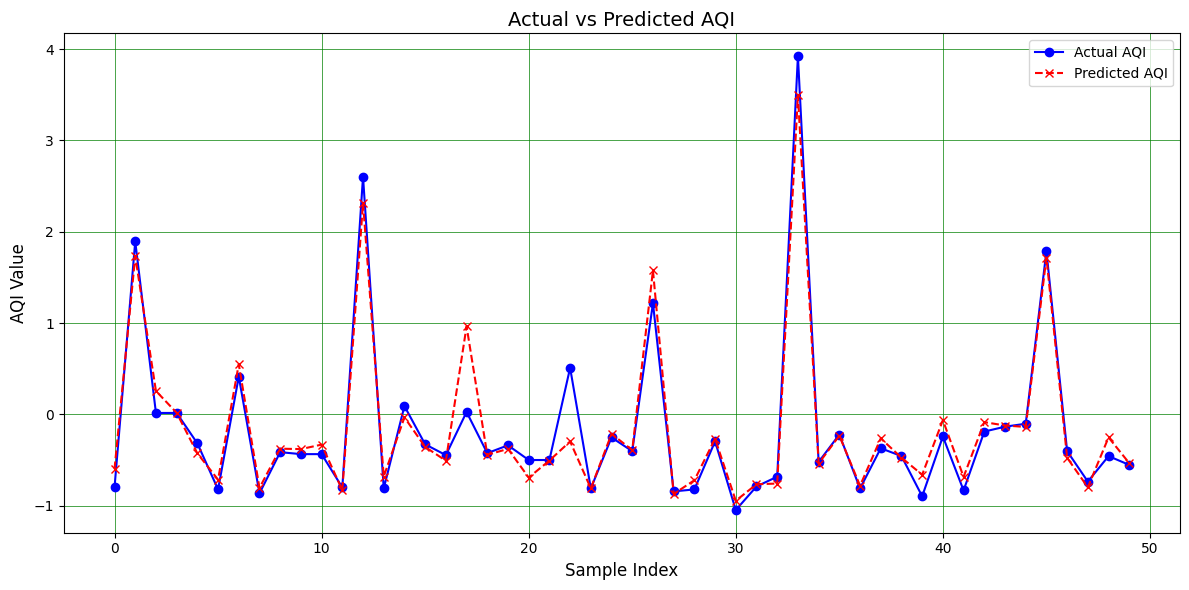

In [ ]:
df1 = pd.DataFrame({
    'Actual': y_test[100:150].flatten(),
    'Predicted': y_prediction[100:150].flatten()
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Actual'], label='Actual AQI', marker='o', linestyle='-', color='blue')
plt.plot(df1.index, df1['Predicted'], label='Predicted AQI', marker='x', linestyle='--', color='red')

# Graph details
plt.title('Actual vs Predicted AQI', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)

plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tight_layout()
plt.show()

In [ ]:
# Convert true and predicted values to binary labels
threshold = 0.5
y_test_bin = (y_test > threshold).astype(int)
y_pred_bin = (y_prediction > threshold).astype(int)

# classification report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       986
           1       0.95      0.84      0.89       262

    accuracy                           0.96      1248
   macro avg       0.95      0.91      0.93      1248
weighted avg       0.96      0.96      0.95      1248



# **2.SVR**

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [ ]:
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9488810575457631
mean_sqrd_error is  0.04906288647721212
Root mean squared error of is 0.22150143673848285
Mean Absolute error is 0.14865643625647337


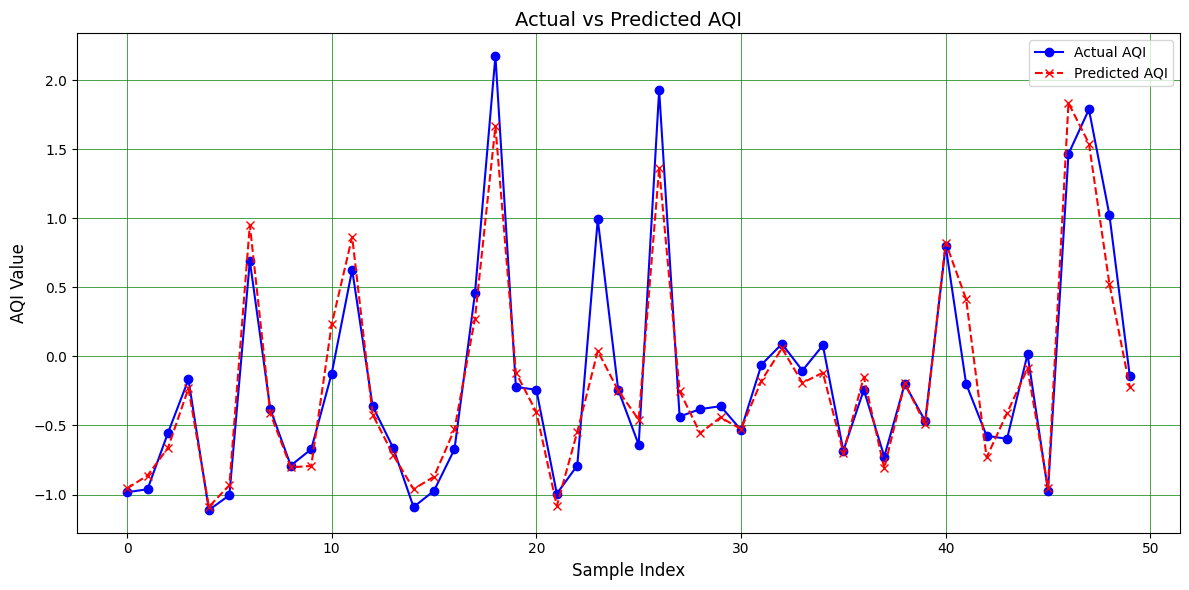

In [ ]:
df1 = pd.DataFrame({
    'Actual': y_test[150:200].flatten(),
    'Predicted': y_prediction[150:200].flatten()
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Actual'], label='Actual AQI', marker='o', linestyle='-', color='blue')
plt.plot(df1.index, df1['Predicted'], label='Predicted AQI', marker='x', linestyle='--', color='red')

# Graph details
plt.title('Actual vs Predicted AQI', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)

plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Convert to binary labels
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (y_prediction > 0).astype(int)

# Step 2: Print classification report
print(classification_report(y_test_binary, y_pred_binary, target_names=['Low AQI', 'High AQI']))

              precision    recall  f1-score   support

     Low AQI       0.94      0.96      0.95       816
    High AQI       0.91      0.88      0.89       432

    accuracy                           0.93      1248
   macro avg       0.92      0.92      0.92      1248
weighted avg       0.93      0.93      0.93      1248



# **3.LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  regressor.predict(x_test)

In [ ]:
score = r2_score(y_test,y_prediction)
mean_error = mean_squared_error(y_test,y_prediction)
mae = mean_absolute_error(y_test,y_prediction)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)

R2 SCORE is 0.9217139055744
mean_sqrd_error is  0.07513734790163239
Root mean squared error of is 0.27411192586538874
Mean Absolute error is 0.19497461886894274


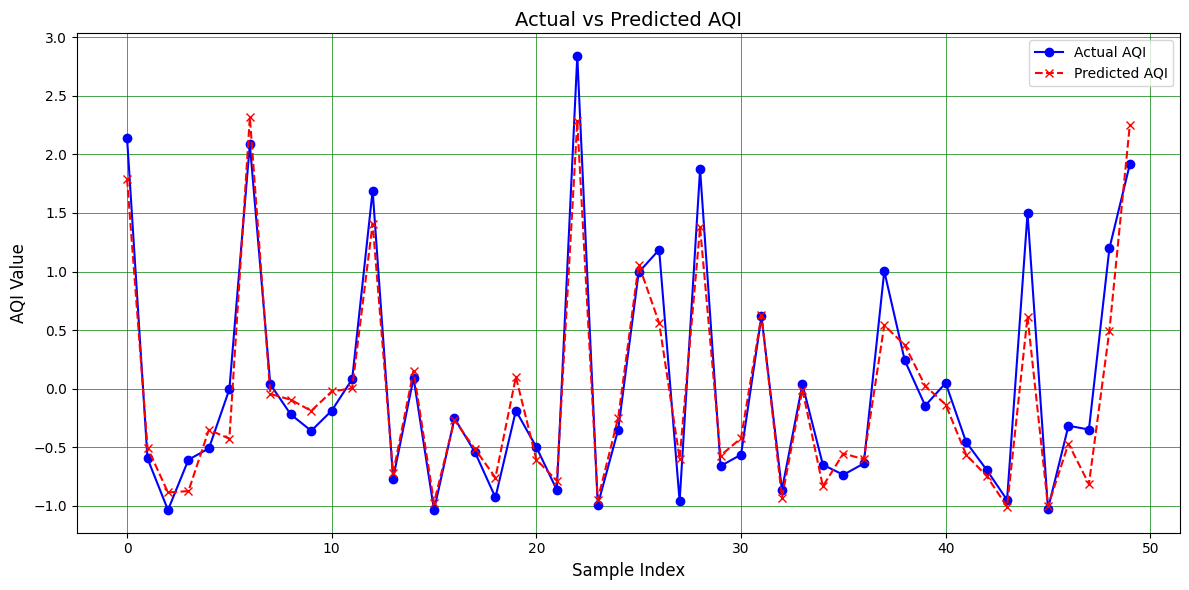

In [ ]:
df1 = pd.DataFrame({
    'Actual': y_test[200:250].flatten(),
    'Predicted': y_prediction[200:250].flatten()
})

plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Actual'], label='Actual AQI', marker='o', linestyle='-', color='blue')
plt.plot(df1.index, df1['Predicted'], label='Predicted AQI', marker='x', linestyle='--', color='red')

plt.title('Actual vs Predicted AQI', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)

plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tight_layout()
plt.show()


In [ ]:
# Binarize predictions and actual values
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (y_prediction > 0).astype(int)

# Print classification report only
print(classification_report(y_test_binary, y_pred_binary, target_names=['Low AQI', 'High AQI']))


              precision    recall  f1-score   support

     Low AQI       0.95      0.92      0.93       816
    High AQI       0.86      0.90      0.88       432

    accuracy                           0.92      1248
   macro avg       0.90      0.91      0.91      1248
weighted avg       0.92      0.92      0.92      1248



# **4.LSTM**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Filter required features and drop rows with missing values
#features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Benzene','NO','NOx','NH3','Toluene','Xylene']
df = df[features + ['AQI']].dropna()

# Split into features and target
X = df[features]
y = df['AQI']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

import torch
import torch.nn as nn
from torch.autograd import Variable
X_train_tensor = Variable(torch.Tensor(x_train))
X_test_tensor = Variable(torch.Tensor(x_test))

Y_train_tensor = Variable(torch.Tensor(y_train))
Y_test_tensor = Variable(torch.Tensor(y_test))

X_train_tensor = torch.reshape(X_train_tensor, (X_train_tensor.shape[0], 1, X_train_tensor.shape[1]))
X_test_tensor = torch.reshape(X_test_tensor, (X_test_tensor.shape[0], 1, X_test_tensor.shape[1]))


In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_features, hidden_size, num_layers, output_size, dropout=0.3):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size=num_features, hidden_size=hidden_size,
                            num_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


num_features = X_train_tensor.shape[2]
hidden_size = 256
num_layers = 2
output_size = 1
dropout = 0.3

lstm1 = LSTM(num_features, hidden_size, num_layers, output_size, dropout)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm1.parameters(), lr=0.001)  # reduced learning rate

epochs = 501
best_loss = float("inf")
patience = 50
trigger_times = 0

for epoch in range(epochs):
    lstm1.train()
    optimizer.zero_grad()

    outputs = lstm1(X_train_tensor)
    loss = loss_fn(outputs, Y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.5f}")

    # Early stopping logic
    if loss.item() < best_loss:
        best_loss = loss.item()
        trigger_times = 0
        torch.save(lstm1.state_dict(), "best_lstm_model.pth")
    else:
        trigger_times += 1
        if trigger_times > patience:
            print(f"Early stopping at epoch {epoch}")
            break


Epoch [0/501], Loss: 1.00124
Epoch [100/501], Loss: 0.06673
Epoch [200/501], Loss: 0.06329
Epoch [300/501], Loss: 0.06110
Epoch [400/501], Loss: 0.05896
Epoch [500/501], Loss: 0.05754


In [ ]:
lstm1.eval()
test_predict = lstm1(X_test_tensor)

# Convert predictions and actual to NumPy
data_predict = test_predict.data.numpy()
data_predict = sc_y.inverse_transform(data_predict)

data_actual = Y_test_tensor.data.numpy()
data_actual = sc_y.inverse_transform(data_actual)

score = r2_score(data_actual, data_predict)
rmean_error = np.sqrt(mean_squared_error(data_actual, data_predict))
mae = mean_absolute_error(data_actual, data_predict)
print("R2 SCORE is", score)
print("Root mean squared error of is",rmean_error)
print("Mean Absolute error is", mae)

R2 SCORE is 0.9436368346214294
Root mean squared error of is 21.6553269667109
Mean Absolute error is 15.223366737365723


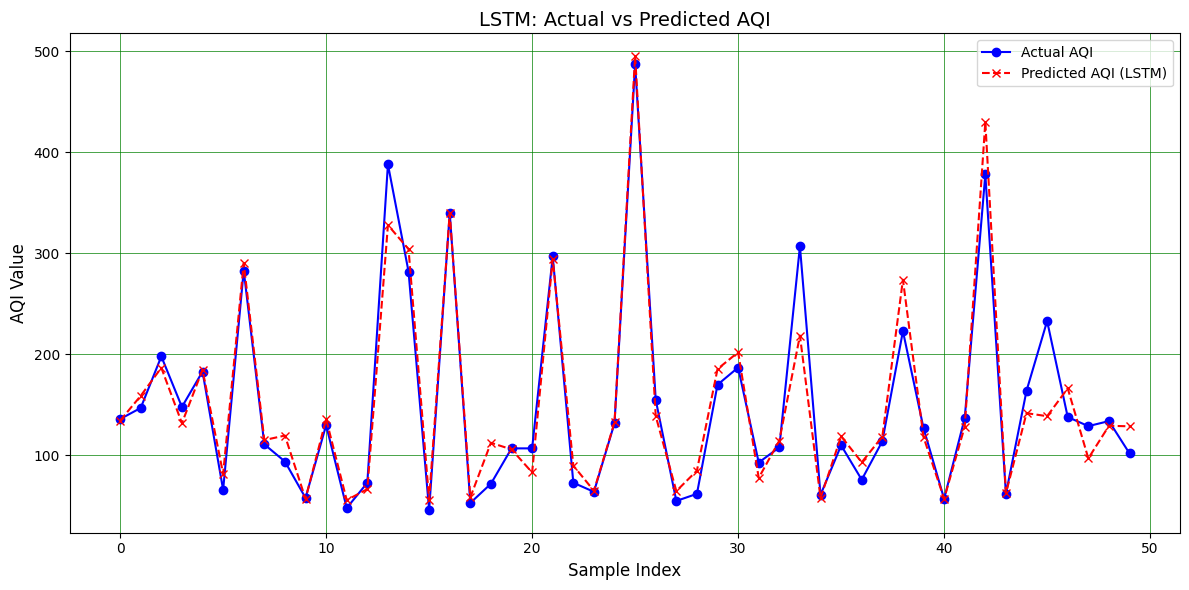

In [ ]:
# Ensure both arrays are NumPy and flattened
actual_lstm = data_actual.flatten()
predicted_lstm = data_predict.flatten()

# Create a DataFrame for a sample range
lstm_df = pd.DataFrame({
    'Actual': actual_lstm[10:60],
    'Predicted': predicted_lstm[10:60]
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lstm_df.index, lstm_df['Actual'], label='Actual AQI', marker='o', linestyle='-', color='blue')
plt.plot(lstm_df.index, lstm_df['Predicted'], label='Predicted AQI (LSTM)', marker='x', linestyle='--', color='red')

# Graph details
plt.title('LSTM: Actual vs Predicted AQI', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)

plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tight_layout()
plt.show()

In [ ]:
# Define a threshold to convert regression output to class labels
threshold = 50

# Convert actual and predicted AQI to binary labels
actual_labels = (data_actual > threshold).astype(int)
predicted_labels = (data_predict > threshold).astype(int)

# Print classification report
print(classification_report(actual_labels, predicted_labels, target_names=["Low AQI", "High AQI"]))


              precision    recall  f1-score   support

     Low AQI       0.93      0.40      0.56        94
    High AQI       0.95      1.00      0.98      1154

    accuracy                           0.95      1248
   macro avg       0.94      0.70      0.77      1248
weighted avg       0.95      0.95      0.94      1248



# **5.CNN**

In [ ]:
# Reshape for CNN: [samples, channels=1, features]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

# CNN Model

class CNNModel(nn.Module):
    def __init__(self, num_features):
        super(CNNModel, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        self.fc1 = nn.Linear(64 * ((num_features - 1) // 2), 50)
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Pass correct num_features to CNN
num_features = x_train.shape[2]
model = CNNModel(num_features)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train model
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    output = model(X_train_tensor)
    loss = criterion(output, Y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.5f}")


Epoch [0/300], Loss: 1.10056
Epoch [50/300], Loss: 0.09148
Epoch [100/300], Loss: 0.07649
Epoch [150/300], Loss: 0.07014
Epoch [200/300], Loss: 0.06617
Epoch [250/300], Loss: 0.06358


In [ ]:
# Predict
model.eval()
Y_pred_tensor = model(X_test_tensor).detach().numpy()
Y_pred_inv = sc_y.inverse_transform(Y_pred_tensor)
Y_actual_inv = sc_y.inverse_transform(Y_test_tensor.detach().numpy())

# Metrics
print("R2 Score:", r2_score(Y_actual_inv, Y_pred_inv))
print("MSE:", mean_squared_error(Y_actual_inv, Y_pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(Y_actual_inv, Y_pred_inv)))
print("MAE:", mean_absolute_error(Y_actual_inv, Y_pred_inv))

R2 Score: 0.9417980313301086
MSE: 484.2528076171875
RMSE: 22.005744877581115
MAE: 15.763687133789062


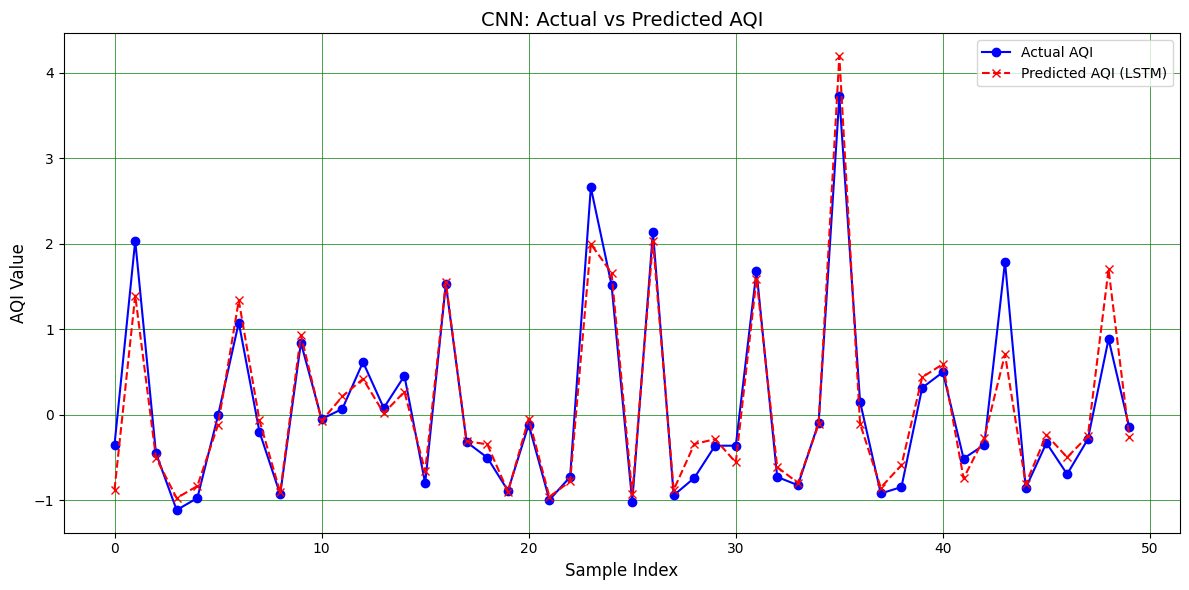

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    predictions = sc_y.inverse_transform(predictions)
    actual = sc_y.inverse_transform(Y_test_tensor.numpy())

cnn_pred = pd.DataFrame({
    'Actual': actual.flatten()[:50],
    'Predicted': predictions.flatten()[:50]
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(cnn_pred.index, cnn_pred['Actual'], label='Actual AQI', marker='o', linestyle='-', color='blue')
plt.plot(cnn_pred.index, cnn_pred['Predicted'], label='Predicted AQI (LSTM)', marker='x', linestyle='--', color='red')

# Graph details
plt.title('CNN: Actual vs Predicted AQI', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)

plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tight_layout()
plt.show()

In [ ]:
threshold = 50

# Convert continuous AQI values to binary labels
actual_labels = (Y_actual_inv > threshold).astype(int).ravel()
predicted_labels = (Y_pred_inv > threshold).astype(int).ravel()

# Print classification report
print(classification_report(actual_labels, predicted_labels, target_names=["Low AQI", "High AQI"]))


              precision    recall  f1-score   support

     Low AQI       0.95      0.44      0.60        94
    High AQI       0.96      1.00      0.98      1154

    accuracy                           0.96      1248
   macro avg       0.95      0.72      0.79      1248
weighted avg       0.96      0.96      0.95      1248

